<a href="https://colab.research.google.com/github/jadergreiner/ExerciciosPython/blob/main/An%C3%A1lise_explorat%C3%B3ria_de_dados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análise exploratória de dados

In [2]:
# importando as bibliotecas
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use("seaborn")

In [3]:
# upload do arquivo 
from google.colab import files
arq = files.upload()

Saving AdventureWorks.xlsx to AdventureWorks.xlsx


In [9]:
# criando nosso df
df = pd.read_excel("AdventureWorks.xlsx")
# visualizando as linhas
df.head()
#qtde de linhas e colunas
df.shape
# tipo de dados
df.dtypes

Data Venda        datetime64[ns]
Data Envio        datetime64[ns]
ID Loja                    int64
ID Produto                 int64
ID Cliente                 int64
No. Venda                 object
Custo Unitário           float64
Preço Unitário           float64
Quantidade                 int64
Valor Desconto           float64
Valor Venda              float64
Produto                   object
Fabricante                object
Marca                     object
Classe                    object
Cor                       object
dtype: object

In [10]:
# Qual a receita total
df["Valor Venda"].sum()

5984606.1426

In [13]:
# qual o custo total
df["custo"] = df['Custo Unitário'].mul(df['Quantidade'])

In [16]:
# agora temos a receita e o custo total, podemos achar o lucro total
df["lucro"] = df['Valor Venda'] - df["custo"]

In [18]:
# Total lucro
round(df["lucro"].sum(),2)

3497823.09

In [19]:
# criando uma coluna com total de dias para enviar o produto
df["tempo de envio"] = df['Data Envio'] - df['Data Venda']

In [23]:
# qual a media de tempo de envio para cada marca

# extraindo apenas os dias em numero
df["tempo de envio"] = (df['Data Envio'] - df['Data Venda']).dt.days

# media por marca
df.groupby("Marca")["tempo de envio"].mean()

Marca
Adventure Works    8.663866
Contoso            8.470930
Fabrikam           8.510121
Name: tempo de envio, dtype: float64

## Missing values

In [24]:
# verificando se temos dados faltantes
df.isnull().sum()


Data Venda        0
Data Envio        0
ID Loja           0
ID Produto        0
ID Cliente        0
No. Venda         0
Custo Unitário    0
Preço Unitário    0
Quantidade        0
Valor Desconto    0
Valor Venda       0
Produto           0
Fabricante        0
Marca             0
Classe            0
Cor               0
custo             0
lucro             0
tempo de envio    0
dtype: int64

## se quisermos saber o lucro por ano e por marca?

In [31]:
pd.options.display.float_format = '{:20,.2f}' .format
df.groupby([df["Data Venda"].dt.year, "Marca"])["lucro"].sum()

Data Venda  Marca          
2008        Adventure Works             306,641.16
            Contoso                      56,416.00
            Fabrikam                  1,557,020.55
2009        Adventure Works             405,395.08
            Contoso                     138,258.95
            Fabrikam                  1,034,091.35
Name: lucro, dtype: float64

In [34]:
# resentando o index
lucro_ano = df.groupby([df['Data Venda'].dt.year, "Marca"])["lucro"].sum().reset_index()
lucro_ano

,Data Venda,Marca,lucro
0,2008,Adventure Works,"306,641.16"
1,2008,Contoso,"56,416.00"
2,2008,Fabrikam,"1,557,020.55"
3,2009,Adventure Works,"405,395.08"
4,2009,Contoso,"138,258.95"
5,2009,Fabrikam,"1,034,091.35"


In [36]:
# Qual o total de produtos vendidos?
df.groupby("Produto")["Quantidade"].sum().sort_values(ascending=False)

Produto
Headphone Adapter for Contoso Phone E130 Silver    25232
Headphone Adapter for Contoso Phone E130 White     25008
Adventure Works Laptop15.4W M1548 Black             1089
Fabrikam Trendsetter 2/3'' 17mm X100 Grey           1087
Adventure Works Laptop15.4W M1548 Red               1047
Fabrikam Trendsetter 2/3'' 17mm X100 Black           926
Fabrikam Trendsetter 1/3'' 8.5mm X200 Black          884
Fabrikam Trendsetter 1/3'' 8.5mm X200 Grey           845
Fabrikam Trendsetter 1/3'' 8.5mm X200 White          789
Name: Quantidade, dtype: int64

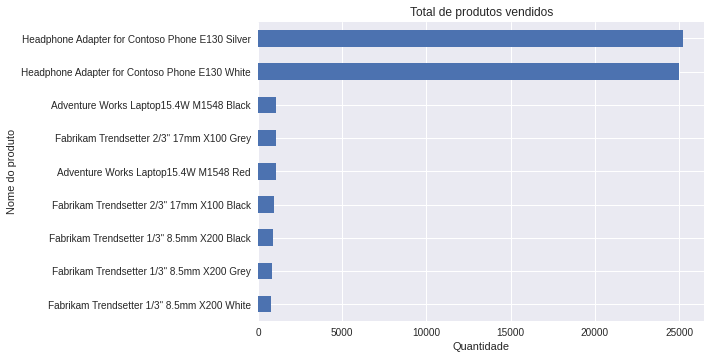

In [40]:
# Gráfico total de produtos vendidos
df.groupby("Produto")["Quantidade"].sum().sort_values(ascending=True).plot.barh(title="Total de produtos vendidos")
plt.xlabel("Quantidade")
plt.ylabel("Nome do produto")
plt.show()

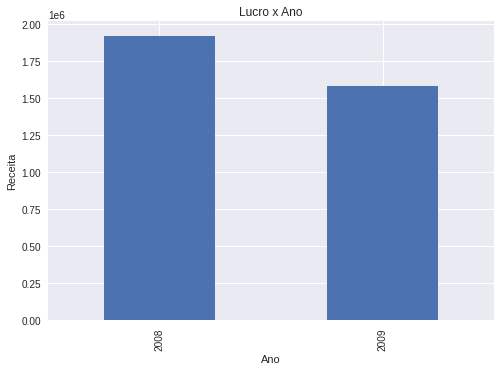

In [47]:
df.groupby(df['Data Venda'].dt.year)["lucro"].sum().plot.bar(title="Lucro x Ano")
plt.xlabel("Ano")
plt.ylabel("Receita")
plt.show()

In [48]:
# analisando tempos de envio
df['tempo de envio'].describe()

count                 904.00
mean                    8.54
std                     3.06
min                     4.00
25%                     6.00
50%                     9.00
75%                    11.00
max                    20.00
Name: tempo de envio, dtype: float64

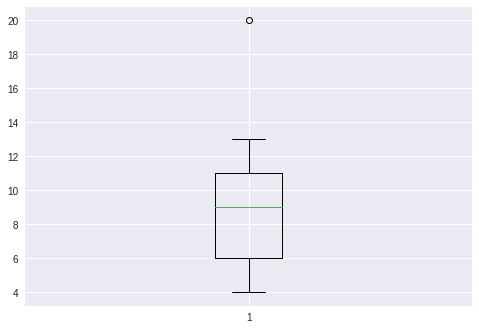

In [51]:
# gráfico de Boxplot # identificando outliers
plt.boxplot(df['tempo de envio']);

(array([217., 137.,  70., 179., 115., 185.,   0.,   0.,   0.,   1.]),
 array([ 4. ,  5.6,  7.2,  8.8, 10.4, 12. , 13.6, 15.2, 16.8, 18.4, 20. ]),
 <a list of 10 Patch objects>)

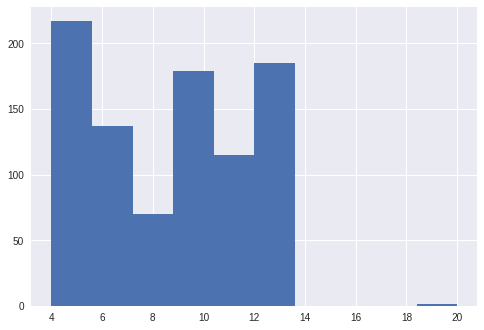

In [52]:
# análise tempo de envio pelo histograma
plt.hist(df['tempo de envio'])

In [54]:
# salvando em novo arquivo
df.to_csv("df_vendas_novo.csv", index=False)